In [14]:
# Import the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
city_data = []


In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size= 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_Ings = zip(lats, lngs)
lat_Ings

In [19]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_Ings)

In [20]:
# Use the  print() function to display the latitudes and longitudes combinations.

for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-20.90323592995111 -156.6721317499353
-62.56566615826008 -94.97927502247212
-33.074107331450115 -177.07996042794593
-34.70618206325568 -140.1975608582496
-73.70528547710515 -86.42932828579013
-26.522065983926296 6.308585047267712
-35.60208864040248 -94.71541362588981
-85.20068861656975 -155.30740557549788
17.857299957408614 -19.35141920187246
29.0797361692525 31.079987151862184
56.266778020208676 -41.71190606805723
-71.22056419579988 103.44132335288714
-21.03676004834908 127.66323498392092
70.57199172323303 100.56189878899471
-59.304320383649035 51.35031630412692
-15.57556147067801 -172.74777602171494
-74.062678277764 -142.5553514056118
-56.50569747596907 -20.55616052880481
-83.30834699310347 -63.140814738459625
6.1304733724434755 55.357803076921215
-13.326141889872616 -137.01160604633006
-39.354453854997246 140.14696332104643
17.150667748069168 -2.008992277599532
-82.01081777095183 133.49964021066586
-46.363030821625685 55.0703518300605
-40.21567715232464 166.88872952125251
-18.947569

78.38249695470739 69.84654618668623
-72.96573177413036 72.77012525814234
-56.52716538174188 165.63102816223864
-31.18440758412173 112.7821992728177
-29.959817274901738 -44.82777785307215
1.581668084793776 142.72556073352524
-67.59887422668291 16.599972784337865
-30.05642946919025 -156.08129093447408
42.35928394508781 83.50892925094826
70.55185795044704 119.50468607907231
-71.45531264168397 -7.026358436736729
-65.36467016926778 -76.72145601771021
2.7810327790333815 -147.74202026261744
41.587166334230346 -177.16863525874004
-17.821065824923835 -113.7220326987022
-13.495931842506678 -20.593788868159606
-36.92778195074145 -88.09705427998831
-58.592937729975326 -88.80744464219032
-37.17949438287834 78.17736583769607
62.38285243103627 -153.6666747420036
44.23447408055847 70.43407589089713
52.12524035685243 -20.64737903427303
67.44741104169358 26.581787792575483
-33.34537050353526 -28.40007072974899
-49.08538714115474 124.14200052550115
-58.70766085488874 151.1754159698284
-73.7541647167829 7

In [21]:
from citipy import citipy

In [22]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

612

In [23]:
# Import the time library and the datetime module from the datetime library
import time

from datetime import datetime 


In [24]:
#  Create an empty list to hold the weather data.
city_data = []

# print the beginning of the logging.
print("Beginning Data Retrieval ")
print("-------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval 
-------------------------


In [25]:
# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]    

In [26]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | avarua
Processing Record 2 of Set 13 | punta arenas
Processing Record 3 of Set 13 | vaini
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | luderitz
Processing Record 6 of Set 13 | lebu
Processing Record 7 of Set 13 | mataura
Processing Record 8 of Set 13 | nouakchott
Processing Record 9 of Set 13 | beni suef
Processing Record 10 of Set 13 | nanortalik
Processing Record 11 of Set 13 | albany
Processing Record 12 of Set 13 | yulara
Processing Record 13 of Set 13 | khatanga
Processing Record 14 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 15 of Set 13 | hihifo
City not found. Skipping...
Processing Record 16 of Set 13 | cidreira
Processing Record 17 of Set 13 | ushuaia
Processing Record 18 of Set 13 | bandarbeyla
Processing Record 19 of Set 13 | atuona
Processing Record 20 of Set 13 | mount gambier
Processing Record 21 of Set 13 | tombouctou
Processing Record 22 of Set 13 | hobart
Processing Record 23 of Set 13 |

City not found. Skipping...
Processing Record 35 of Set 16 | bartica
Processing Record 36 of Set 16 | mongo
Processing Record 37 of Set 16 | lady frere
Processing Record 38 of Set 16 | faya
Processing Record 39 of Set 16 | kuche
City not found. Skipping...
Processing Record 40 of Set 16 | phangnga
Processing Record 41 of Set 16 | buzmeyin
Processing Record 42 of Set 16 | srivardhan
Processing Record 43 of Set 16 | kaitangata
Processing Record 44 of Set 16 | pechenga
Processing Record 45 of Set 16 | fort-shevchenko
Processing Record 46 of Set 16 | lagoa
Processing Record 47 of Set 16 | lorengau
Processing Record 48 of Set 16 | tawkar
City not found. Skipping...
Processing Record 49 of Set 16 | kavieng
Processing Record 50 of Set 16 | vao
Processing Record 1 of Set 17 | mehamn
Processing Record 2 of Set 17 | sibolga
Processing Record 3 of Set 17 | olafsvik
Processing Record 4 of Set 17 | yakuplu
Processing Record 5 of Set 17 | saint-francois
Processing Record 6 of Set 17 | aklavik
Proces

Processing Record 17 of Set 20 | taywarah
Processing Record 18 of Set 20 | narasannapeta
Processing Record 19 of Set 20 | altamira
Processing Record 20 of Set 20 | pinawa
Processing Record 21 of Set 20 | dunedin
Processing Record 22 of Set 20 | port lincoln
Processing Record 23 of Set 20 | middelharnis
Processing Record 24 of Set 20 | bani walid
Processing Record 25 of Set 20 | rawannawi
City not found. Skipping...
Processing Record 26 of Set 20 | jumla
Processing Record 27 of Set 20 | erenhot
Processing Record 28 of Set 20 | bathsheba
Processing Record 29 of Set 20 | porto novo
Processing Record 30 of Set 20 | longyearbyen
Processing Record 31 of Set 20 | shenjiamen
Processing Record 32 of Set 20 | brigantine
Processing Record 33 of Set 20 | orsha
Processing Record 34 of Set 20 | novikovo
Processing Record 35 of Set 20 | sao felix do xingu
Processing Record 36 of Set 20 | bunia
Processing Record 37 of Set 20 | tiznit
Processing Record 38 of Set 20 | nakasongola
Processing Record 39 of

Processing Record 4 of Set 24 | dabwali
Processing Record 5 of Set 24 | narsaq
Processing Record 6 of Set 24 | el alto
Processing Record 7 of Set 24 | tikrit
Processing Record 8 of Set 24 | bad mergentheim
Processing Record 9 of Set 24 | tsienyane
City not found. Skipping...
Processing Record 10 of Set 24 | dalmeny
Processing Record 11 of Set 24 | methoni
Processing Record 12 of Set 24 | alyangula
Processing Record 13 of Set 24 | ariquemes
Processing Record 14 of Set 24 | risor
Processing Record 15 of Set 24 | san felipe
Processing Record 16 of Set 24 | tibiao
Processing Record 17 of Set 24 | komatipoort
Processing Record 18 of Set 24 | caraz
Processing Record 19 of Set 24 | chacaltianguis
Processing Record 20 of Set 24 | north platte
Processing Record 21 of Set 24 | shcholkine
City not found. Skipping...
Processing Record 22 of Set 24 | huallanca
Processing Record 23 of Set 24 | henties bay
Processing Record 24 of Set 24 | los llanos de aridane
Processing Record 25 of Set 24 | novosys

In [27]:
len(city_data)

559

In [37]:
# Convert the array of dictionaries to a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.2078,-159.7750,69.85,52,100,3.44,CK,2022-07-24 17:43:41
1,Punta Arenas,-53.1500,-70.9167,41.02,65,20,18.41,CL,2022-07-24 17:43:41
2,Vaini,-21.2000,-175.2000,69.96,88,40,6.91,TO,2022-07-24 17:39:45
3,Rikitea,-23.1203,-134.9692,74.89,79,80,14.27,PF,2022-07-24 17:43:42
4,Luderitz,-26.6481,15.1594,64.42,52,0,9.44,NA,2022-07-24 17:43:42
5,Lebu,-37.6167,-73.6500,48.92,96,100,5.95,CL,2022-07-24 17:43:42
6,Mataura,-46.1927,168.8643,33.48,98,14,2.51,NZ,2022-07-24 17:43:43
7,Nouakchott,18.0858,-15.9785,80.53,79,34,13.89,MR,2022-07-24 17:43:43
8,Beni Suef,29.0731,31.0979,92.23,20,7,20.11,EG,2022-07-24 17:43:44
9,Nanortalik,60.1432,-45.2371,47.64,77,100,3.80,GL,2022-07-24 17:43:44


In [38]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_column_order

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

In [30]:
new_column_order = city_data_df[new_column_order]
new_column_order.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2022-07-24 17:43:41,-21.2078,-159.7750,69.85,52,100,3.44
1,Punta Arenas,CL,2022-07-24 17:43:41,-53.1500,-70.9167,41.02,65,20,18.41
2,Vaini,TO,2022-07-24 17:39:45,-21.2000,-175.2000,69.96,88,40,6.91
3,Rikitea,PF,2022-07-24 17:43:42,-23.1203,-134.9692,74.89,79,80,14.27
4,Luderitz,NA,2022-07-24 17:43:42,-26.6481,15.1594,64.42,52,0,9.44
5,Lebu,CL,2022-07-24 17:43:42,-37.6167,-73.6500,48.92,96,100,5.95
6,Mataura,NZ,2022-07-24 17:43:43,-46.1927,168.8643,33.48,98,14,2.51
7,Nouakchott,MR,2022-07-24 17:43:43,18.0858,-15.9785,80.53,79,34,13.89
8,Beni Suef,EG,2022-07-24 17:43:44,29.0731,31.0979,92.23,20,7,20.11
9,Nanortalik,GL,2022-07-24 17:43:44,60.1432,-45.2371,47.64,77,100,3.80


In [31]:
# Create the output file csv
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [32]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

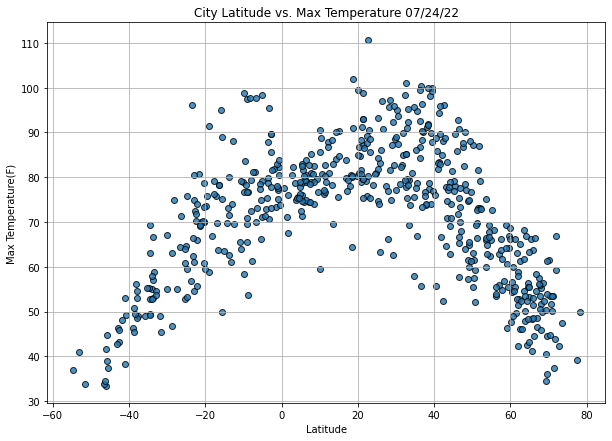

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs max temperature
plt.figure(figsize=(10,7))
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

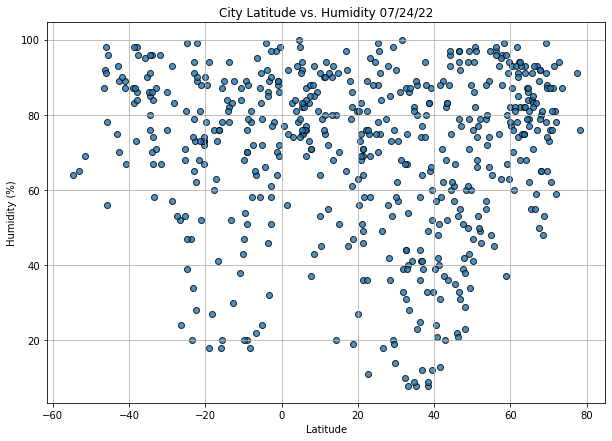

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,7))
plt.scatter (lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot
plt.show()

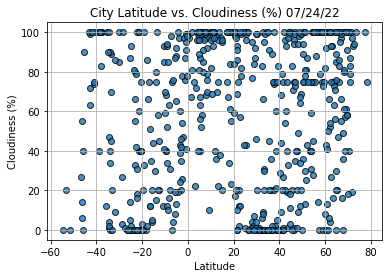

In [35]:
# Build the scatter plots for latitude va. cloudiness.
plt.scatter(lats,
           cloudiness,
            edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incoperate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figures
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

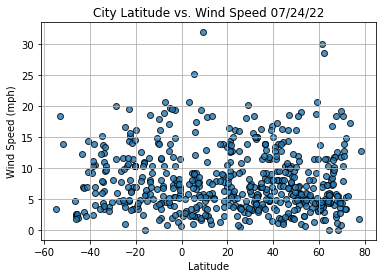

In [36]:
# Build the scatter plots for latitude vs wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [48]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [49]:
index13 =city_data_df.loc[13]
index13

City                     Cidreira
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    67.05
Humidity                       86
Cloudiness                     85
Wind Speed                   4.52
Country                        BR
Date          2022-07-24 17:43:45
Name: 13, dtype: object

In [50]:
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4      False
       ...  
554     True
555     True
556     True
557     True
558    False
Name: Lat, Length: 559, dtype: bool

In [51]:
city_data_df.loc[(city_data_df["Lat"] >=0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
7,Nouakchott,18.0858,-15.9785,80.53,79,34,13.89,MR,2022-07-24 17:43:43
8,Beni Suef,29.0731,31.0979,92.23,20,7,20.11,EG,2022-07-24 17:43:44
9,Nanortalik,60.1432,-45.2371,47.64,77,100,3.80,GL,2022-07-24 17:43:44
10,Albany,42.6001,-73.9662,96.17,37,54,1.99,US,2022-07-24 17:43:31
12,Khatanga,71.9667,102.5000,66.81,59,93,14.83,RU,2022-07-24 17:43:45


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


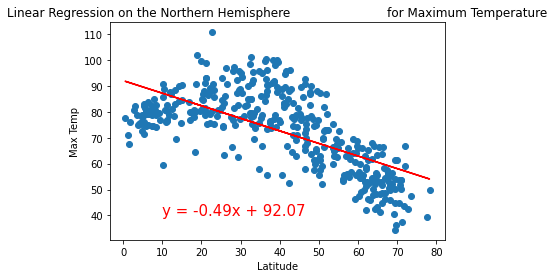

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

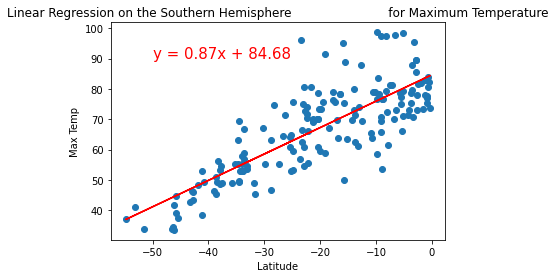

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


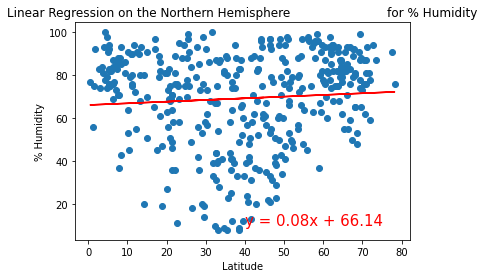

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

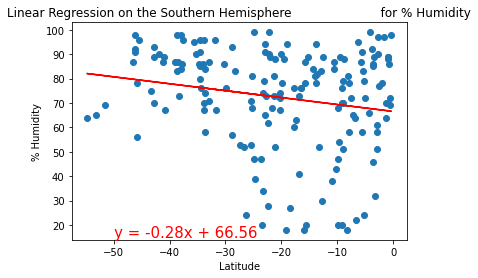

In [72]:
# Linear regression on the Southern Hemishphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Refactor the code we have been using for linear regression lines and plots to create the
# x- and y-values for the percent cloudiness and latitudes on the Northern Hemisphere DataFrame.
#Call the plot_linear_regression function with the correct arguments to create the linear regression 
# line and plot for percent cloudiness in the Northern Hemisphere. It should look like the following plot. 
# 6.4.4


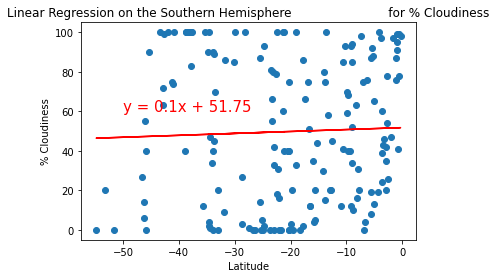

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

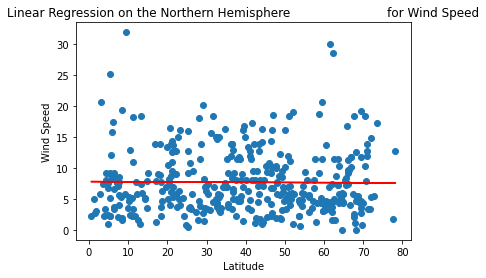

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

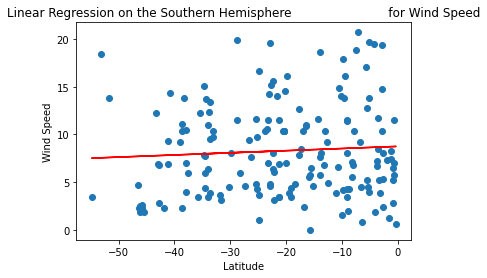

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))